# **Serie A 2023-2024: INTEGRAZIONE, PULIZIA E ANALISI SUI DATI**

14-Marzo-2025

Cercherò di visualizzare in modo più pulito tutte le tabelle: 

Iniziamo con Serie a_table_2023_2024

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

### Carico i dati di Serie A_table-2023-24

In [3]:
serieA_table = pd.read_csv('Serie A_table_2023_24.csv')

Diamo un occhiata a come e composto il dataset

In [4]:
serieA_table.info() #gbfg
serieA_table.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idx          20 non-null     int64 
 1   name         20 non-null     object
 2   played       20 non-null     int64 
 3   wins         20 non-null     int64 
 4   draws        20 non-null     int64 
 5   losses       20 non-null     int64 
 6   scoresStr    20 non-null     object
 7   goalConDiff  20 non-null     int64 
 8   pts          20 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.5+ KB


,idx,name,played,wins,draws,losses,scoresStr,goalConDiff,pts
0,1,Inter,38,29,7,2,89-22,67,94
1,2,Milan,38,22,9,7,76-49,27,75
2,3,Juventus,38,19,14,5,54-31,23,71
3,4,Atalanta,38,21,6,11,72-42,30,69
4,5,Bologna,38,18,14,6,54-32,22,68


Possiamo notare fin da subito che la tabella è organizzata bene: troviamo l'indice che mi indica quante squadre partecipano, il nome della squadra, le partite giocate, le vittorie,i pareggi,le sconfitte, i goal segnati e subiti nella stessa colonna, la differenza reti e i punti.


Proviamo a creare due colonne differenti per i goal fatti e per i goal subiti, e eliminiamo scoresStr 

In [5]:
serieA_table[['goalSegnati', 'goalSubiti']] = serieA_table['scoresStr'].str.split('-', expand=True)
#elimina la colonna scoresStr
serieA_table.drop('scoresStr', axis=1, inplace=True)

Adesso stampiamo quello che abbiamo fatto dando un ordine sulla stampa delle colonne

In [6]:
serieA_table = serieA_table[['idx', 'name', 'played', 'wins', 'draws', 'losses', 'goalSegnati', 'goalSubiti', 'goalConDiff', 'pts']]
print(serieA_table)

    idx           name  played  wins  draws  losses goalSegnati goalSubiti  \
0     1          Inter      38    29      7       2          89         22   
1     2          Milan      38    22      9       7          76         49   
2     3       Juventus      38    19     14       5          54         31   
3     4       Atalanta      38    21      6      11          72         42   
4     5        Bologna      38    18     14       6          54         32   
5     6           Roma      38    18      9      11          65         46   
6     7          Lazio      38    18      7      13          49         39   
7     8     Fiorentina      38    17      9      12          61         46   
8     9         Torino      38    13     14      11          36         36   
9    10         Napoli      38    13     14      11          55         48   
10   11          Genoa      38    12     13      13          45         45   
11   12          Monza      38    11     12      15          39 

Converto da str a int le tabelle goalSegnati e goalSubiti

In [7]:
serieA_table['goalSegnati'] = serieA_table['goalSegnati'].astype(int)
serieA_table['goalSubiti'] = serieA_table['goalSubiti'].astype(int)

Adesso che abiamo la tabella più pulita, possiamo eseguire delle operazioni statistiche sulle colonne


Calcoliamo alcune statistiche di base, sulle colonne goalSegnati e goalSubiti:
1. Media;
2. Deviazione standard;
3. Varianza;
4. Moda;
5. Mediana.

In [16]:
#statistiche richieste per goalSegnati e goalSubiti
#media
print("Media di goalSegnati e di goalSubiti:")
print(serieA_table['goalSegnati'].mean())
print(serieA_table['goalSubiti'].mean())
print()

#varianza
print("Varianza di goalSegnati e di goalSubiti:")
print(serieA_table['goalSegnati'].var())
print(serieA_table['goalSubiti'].var())
print()

#deviazione standard
print("Deviazione di goalSegnati e di goalSubiti:")
print(serieA_table['goalSegnati'].std())
print(serieA_table['goalSubiti'].std())
print()

#moda
print("Moda di goalSegnati e di goalSubiti:")
print(serieA_table['goalSegnati'].mode())
print(serieA_table['goalSubiti'].mode())
print()

#mediana
print("Mediana di goalSegnati e di goalSubiti:")
print(serieA_table['goalSegnati'].median()) 
print(serieA_table['goalSubiti'].median())
print()


Media di goalSegnati e di goalSubiti:
49.6
49.6

Varianza di goalSegnati e di goalSubiti:
261.8315789473684
222.2526315789474

Deviazione di goalSegnati e di goalSubiti:
16.181210676193807
14.90813977593943

Moda di goalSegnati e di goalSubiti:
0    32
1    54
Name: goalSegnati, dtype: int64
0    46
1    51
2    54
Name: goalSubiti, dtype: int64

Mediana di goalSegnati e di goalSubiti:
44.5
48.5



cerca i primi 7 valori max in goalConDiff con rispettivo name

In [17]:
print("I primi 7 valori massimi di goalConDiff:")
print()
print(serieA_table.nlargest(7, 'goalConDiff')[['idx', 'name', 'goalConDiff']])

I primi 7 valori massimi di goalConDiff:

   idx        name  goalConDiff
0    1       Inter           67
3    4    Atalanta           30
1    2       Milan           27
2    3    Juventus           23
4    5     Bologna           22
5    6        Roma           19
7    8  Fiorentina           15


### CASA VS TRASFERTA

Integriamo le tabelle punti casa e punti trasferta e calocliamo la differenza punti casa vs trasferta per vedere quale squadra ha fatto meglio in casa e in trasferta


In [18]:
home = pd.read_csv('Serie A_table_home_2023_24.csv')
away = pd.read_csv('Serie A_table_away_2023_24.csv')

In [19]:
print(home.head())
print()
print(away.head())

   idx      name  played  wins  draws  losses scoresStr  goalConDiff  pts
0    1     Inter      19    14      4       1     44-11           33   46
1    2  Atalanta      19    13      2       4     42-16           26   41
2    3   Bologna      19    12      5       2     33-12           21   41
3    4     Milan      19    12      4       3     38-17           21   40
4    5      Roma      19    12      4       3     38-19           19   40

   idx      name  played  wins  draws  losses scoresStr  goalConDiff  pts
0    1     Inter      19    15      3       1     45-11           34   48
1    2     Milan      19    10      5       4     38-32            6   35
2    3  Juventus      19     8      7       4     28-20            8   31
3    4    Napoli      19     7      7       5     31-21           10   28
4    5  Atalanta      19     8      4       7     30-26            4   28


Unisco le tabelle, calcolo i punti, faccio la diff tra casa e trasferta e ordino. poi visualizzo graficamente

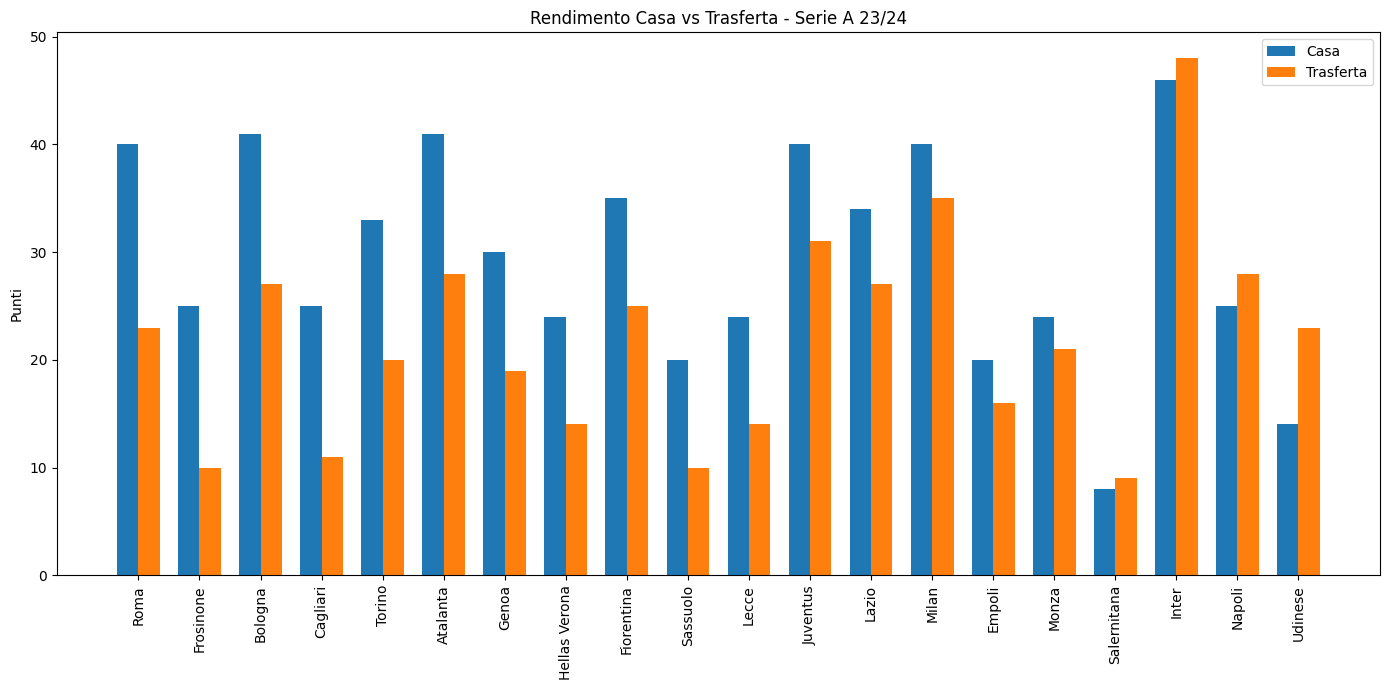

,name,points_home,points_away,points_diff
4,Roma,40,23,17
12,Frosinone,25,10,15
2,Bologna,41,27,14
11,Cagliari,25,11,14
8,Torino,33,20,13
1,Atalanta,41,28,13
9,Genoa,30,19,11
14,Hellas Verona,24,14,10
6,Fiorentina,35,25,10
17,Sassuolo,20,10,10


In [24]:
# Unione dei dati per confronto
home_vs_away = pd.merge(
    home[['idx' ,'name','played','wins','draws','losses','scoresStr','goalConDiff','pts']],
    away[['idx' ,'name','played','wins','draws','losses','scoresStr','goalConDiff','pts']],
    on='name',
    suffixes=('_home', '_away')
)

# Calcolo punti casa/trasferta (3 punti vittoria, 1 punto pareggio)
home_vs_away['points_home'] = home_vs_away['wins_home'] * 3 + home_vs_away['draws_home']
home_vs_away['points_away'] = home_vs_away['wins_away'] * 3 + home_vs_away['draws_away']

# Calcolo differenza punti
home_vs_away['points_diff'] = home_vs_away['points_home'] - home_vs_away['points_away']

# Ordinamento per chi ha più differenza casa/trasferta
home_vs_away_sorted = home_vs_away.sort_values('points_diff', ascending=False)

# Numero squadre
N = len(home_vs_away_sorted)
ind = np.arange(N)  # posizione X
width = 0.35  # larghezza barre

plt.figure(figsize=(14, 7))
plt.bar(ind, home_vs_away_sorted['points_home'], width, label='Casa')
plt.bar(ind + width, home_vs_away_sorted['points_away'], width, label='Trasferta')

plt.ylabel('Punti')
plt.title('Rendimento Casa vs Trasferta - Serie A 23/24')
plt.xticks(ind + width / 2, home_vs_away_sorted['name'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

# Mostra tabella riassuntiva
home_vs_away_sorted[['name', 'points_home', 'points_away', 'points_diff']]


Dai dati acquisiti si può intuire facilmente come Udinese,Napoli,Inter e Salernitanana(anche se di poco) sono riuscite a fare meglio in terre nemiche che a casa propria, invece per quanto riguarda Roma,Frosinone,Bologna,Cagliari,Torino e Atalanta si sono aggiudicate il maggior numero di punti a casa loro.

### Classifica reale vs Expected Goals (xG)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

Carichiamo i dati di Seriea_table e xg_goals

In [25]:
sa = pd.read_csv('Serie A_table_2023_24.csv')
xg = pd.read_csv('Serie A_table_xg_2023_24.csv')


Uniamo calcoliamo la differenza punti e ordiniamo

In [26]:
merged = pd.merge(sa[['name', 'pts']], xg[['name', 'xPoints']], on='name')
# Calcolo differenza punti reali - punti attesi
merged['diff'] = merged['pts'] - merged['xPoints']

# Ordinamento per chi over/underperforma di più
merged_sorted = merged.sort_values('diff', ascending=False)

visualizziamo graficamente il tutto


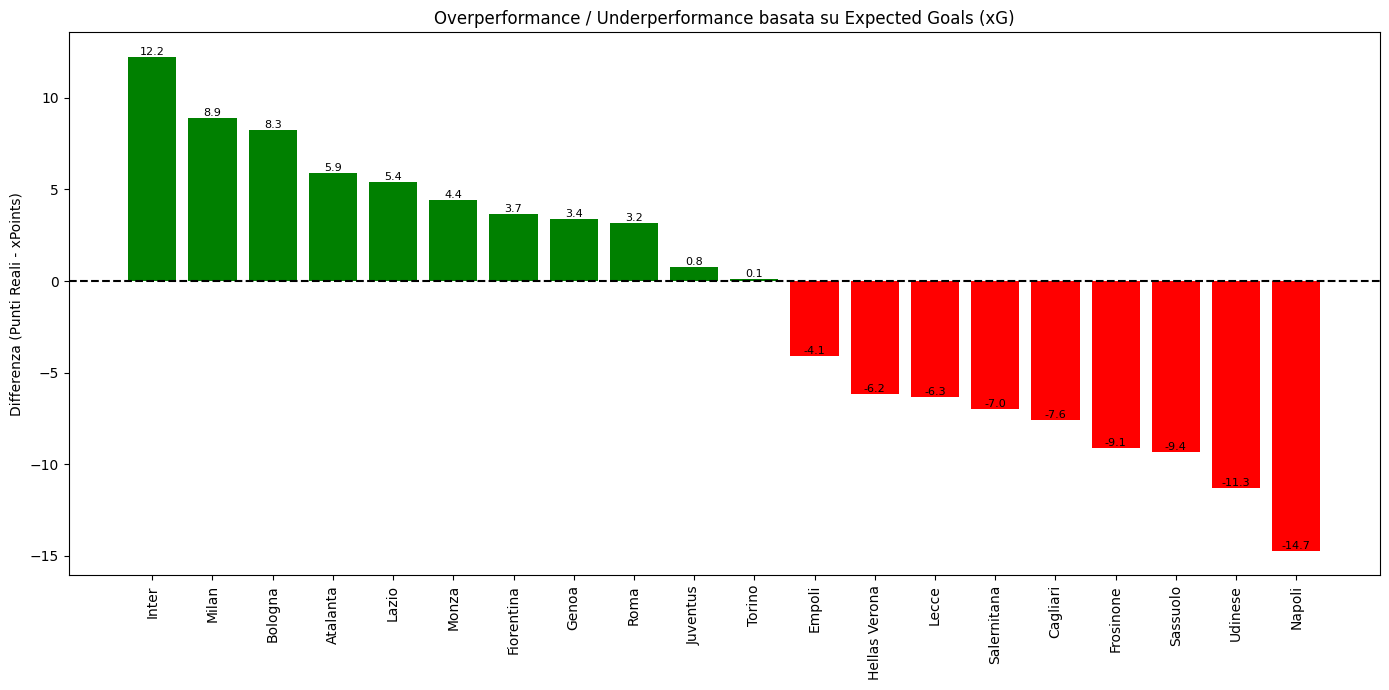

             name  pts    xPoints       diff
0           Inter   94  81.770904  12.229096
1           Milan   75  66.109611   8.890389
4         Bologna   68  59.749251   8.250749
3        Atalanta   69  63.097566   5.902434
6           Lazio   61  55.577535   5.422465
11          Monza   45  40.556915   4.443085
7      Fiorentina   60  56.317305   3.682695
10          Genoa   49  45.626036   3.373964
5            Roma   63  59.841562   3.158438
2        Juventus   71  70.235403   0.764597
8          Torino   53  52.872503   0.127497
16         Empoli   36  40.066971  -4.066971
12  Hellas Verona   38  44.156123  -6.156123
13          Lecce   38  44.322273  -6.322273
19    Salernitana   17  23.963821  -6.963821
15       Cagliari   36  43.601563  -7.601563
17      Frosinone   35  44.089054  -9.089054
18       Sassuolo   30  39.352546  -9.352546
14        Udinese   37  48.323760 -11.323760
9          Napoli   53  67.713537 -14.713537


In [27]:
plt.figure(figsize=(14, 7))
bars = plt.bar(merged_sorted['name'], merged_sorted['diff'], color=['green' if x > 0 else 'red' for x in merged_sorted['diff']])

plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=90)
plt.ylabel('Differenza (Punti Reali - xPoints)')
plt.title('Overperformance / Underperformance basata su Expected Goals (xG)')

# Aggiungiamo le etichette sulle barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,1), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Mostriamo anche la tabella per riferimento
print(merged_sorted[['name', 'pts', 'xPoints', 'diff']])

Da come possiamo notare dal grafico:

Inter, Milan, Bologna → Squadre molto efficienti, probabilmente hanno avuto anche un po’ di fortuna/cinismo.
Napoli, Udinese, Sassuolo → Squadre sfortunate o poco concrete davanti alla porta.

In particolare, il Napoli ha ben 14 punti in meno rispetto a quanto ci si aspetterebbe dagli xG! Questo suggerisce che sta creando buone occasioni, ma non riesce a concretizzarle.